In [59]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from tsp_dp_solver import get_distance_matrix, held_karp
from random_graph_generator import gen_graph
from datetime import datetime

In [42]:
def count_tsp(m,alg=None):
    if alg is None:
        alg=held_karp
    start_t=datetime.now()
    # run held_karp algorithm to brute search the solution of TSP problem
    alg(m)
    end_t=datetime.now()
    return (end_t-start_t).microseconds

In [38]:
min_n=5 # minimun graph size, number of vertices
max_n=20 # maximum graph size, number of vertices
sample_size=20 # sample number for each graph size n

'''
remember that the time complexity of TSP problem is exponential,
set the number of maximum n with caution!

a extremely long runing time is expect for large n
'''

print("start benchmark for held-karp algorithm...")
run_time=np.zeros([max_n-min_n+1,sample_size])
# print(run_time.shape)
for n in range(min_n,max_n+1):
    for i in range(sample_size):
        # generate random matrix and get the distance matrix
        dist_matr=get_distance_matrix(gen_graph(n,scale=10))
        # count time for HK algorithm
        count_tsp(dist_matr)
        run_time[n-min_n,i]=
    print("progress: {0}/{1}".format(n,max_n))

progress: 5/20
progress: 10/20
progress: 15/20


KeyboardInterrupt: 

In [58]:
np.savetxt("benchmark_data.csv",run_time,delimiter=",")

In [82]:
t_mean=run_time.mean(axis=1)
t_max=run_time.max(axis=1)
t_std=r=run_time.std(axis=1)

<ErrorbarContainer object of 3 artists>

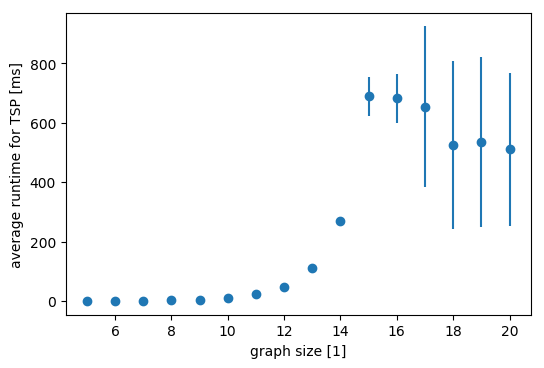

In [116]:
plt.figure().dpi=100
plt.xlabel("graph size [1]")
plt.ylabel("average runtime for TSP [ms]")
plt.errorbar(x=np.arange(min_n,max_n+1),y=t_mean/1000,yerr=t_std/1000,fmt='o')

<ErrorbarContainer object of 3 artists>

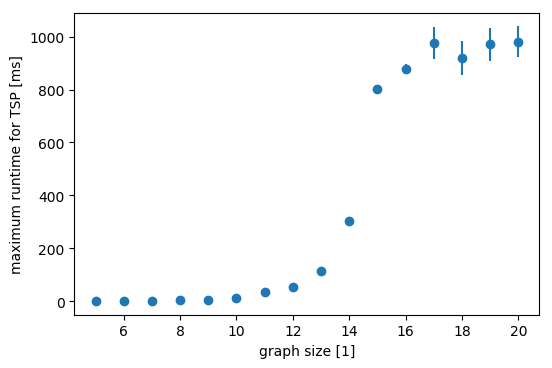

In [119]:
plt.figure().dpi=100
plt.xlabel("graph size [1]")
plt.ylabel("maximum runtime for TSP [ms]")
plt.errorbar(x=np.arange(min_n,max_n+1),y=t_max/1000,yerr=t_std/1000/np.sqrt(max_n),fmt='o')